In [6]:
# import thư viện cần thiết
import pandas as pd
import seaborn as sns

In [7]:
# đọc dữ liệu
df = pd.read_csv("FoodPrice_in_Turkey.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7381 entries, 0 to 7380
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Place        7381 non-null   object 
 1   ProductId    7381 non-null   int64  
 2   ProductName  7381 non-null   object 
 3   UmId         7381 non-null   int64  
 4   UmName       7381 non-null   object 
 5   Month        7381 non-null   int64  
 6   Year         7381 non-null   int64  
 7   Price        7381 non-null   float64
dtypes: float64(1), int64(4), object(3)
memory usage: 461.4+ KB


In [8]:
df.describe()

,ProductId,UmId,Month,Year,Price
count,7381.000000,7381.000000,7381.000000,7381.000000,7381.000000
mean,254.509687,15.252811,6.479881,2017.458474,15.738709
std,141.008599,25.276665,3.530361,1.499256,22.418284
min,52.000000,5.000000,1.000000,2013.000000,0.253900
25%,114.000000,5.000000,3.000000,2017.000000,3.223600
50%,239.000000,5.000000,6.000000,2018.000000,5.909600
75%,388.000000,5.000000,10.000000,2019.000000,20.441900
max,502.000000,102.000000,12.000000,2019.000000,159.445800


In [9]:
df.head()

,Place,ProductId,ProductName,UmId,UmName,Month,Year,Price
0,National Average,52,Rice - Retail,5,KG,5,2013,4.4920
1,National Average,52,Rice - Retail,5,KG,6,2013,4.5786
2,National Average,52,Rice - Retail,5,KG,11,2013,4.7865
3,National Average,52,Rice - Retail,5,KG,12,2013,5.1337
4,National Average,52,Rice - Retail,5,KG,1,2014,5.5099


In [10]:
# Loại bỏ dữ liệu bị khuyết
df = df.dropna()

#### Vẽ biểu đồ xu hướng

In [11]:
# Lọc dữ liệu sản phẩm gạo, vẽ biểu đồ xu hướng qua các năm
rice_df = df[df["ProductId"] == 52]

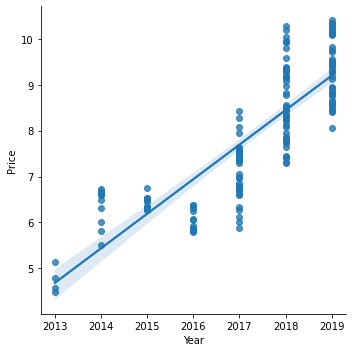

In [12]:
sns.lmplot(x="Year", y="Price",data = rice_df)

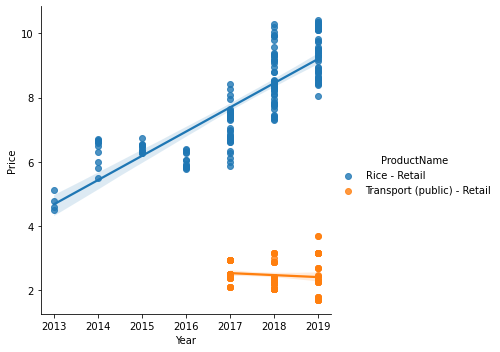

In [13]:
trans_df = df[(df["ProductName"] == "Transport (public) - Retail") | (df["ProductName"] == "Rice - Retail")]
sns.lmplot(x="Year", y="Price", hue="ProductName", data = trans_df)

##### có thể thấy rằng dù chi phí vận chuyển có xu hướng giảm, tuy nhiên giá gạo vẫn tăng khá mạnh, chứng tỏ không có sự liên quan giữa 2 thuộc tính này

#### Vẽ biểu đồ phân bố

<AxesSubplot:ylabel='Price'>

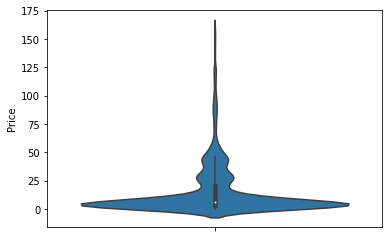

In [14]:
# Biểu đồ phân bố cho giá sản phẩm
sns.violinplot(y = "Price", data=df)

##### Có thể nhận tháy dữ liệu phân bố không được đều, nhiều sản phẩm giá thấp và ít sản phẩm giá cao.

<AxesSubplot:ylabel='Year'>

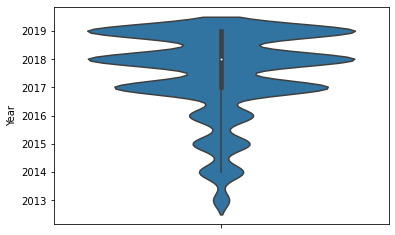

In [15]:
# Biểu đồ phân bố cho năm của sản phẩm
sns.violinplot(y = "Year", data=df)

##### Có thể thấy rằng sản phẩm chủ yếu thuộc những năm gần đây, những năm càng xa thì số lượng càng ít

#### Vẽ biểu đồ tần số

<AxesSubplot:xlabel='Year', ylabel='count'>

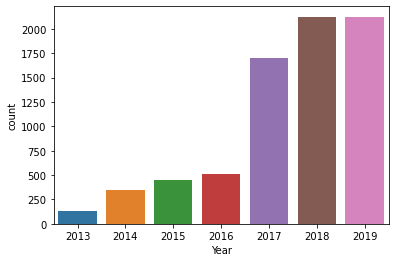

In [16]:
#vẽ biểu đồ tần số cho các sản phẩm theo năm
sns.countplot(x = "Year", data = df)

<AxesSubplot:xlabel='Place', ylabel='count'>

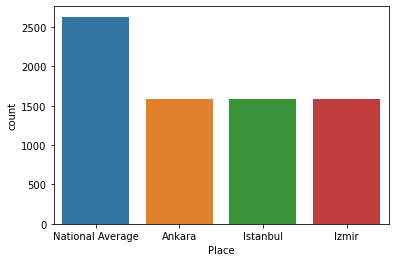

In [17]:
# Thống kê sản phẩm theo địa điểm
sns.countplot(x = "Place", data = df)

<AxesSubplot:xlabel='Year', ylabel='count'>

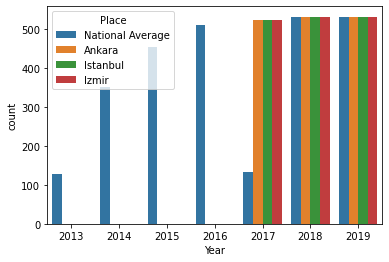

In [18]:
# Hiển thị quan hệ giữa số lượng theo năm được nhím theo địa điểm
sns.countplot(x = "Year", hue = "Place", data = df)

##### Có thể thấy rằng các năm 2013-2016 chỉ có dữ liệu cho sản phẩm ở National Avarage

#### Vẽ biểu đồ box plot

<AxesSubplot:xlabel='Price'>

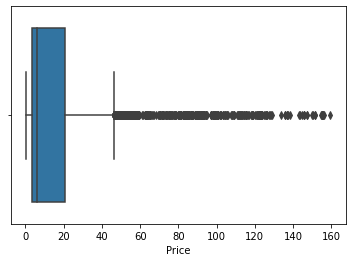

In [19]:
#Vẽ biểu đồ box plot cho thuộc tính giá sản phẩm
sns.boxplot(x=df["Price"])
#giá sản phẩm phân bố rất không đồng đều, tập trung ở giá thấp

<AxesSubplot:xlabel='Year', ylabel='Price'>

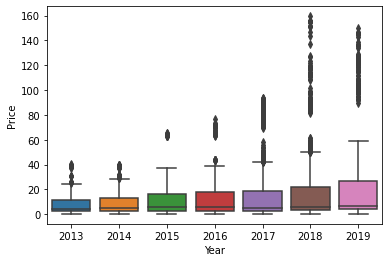

In [20]:
# Vẽ biểu đồ box plot giá sản phẩm phân bố theo năm
sns.boxplot(x = "Year", y = "Price", data=df)